<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/Graphs_heart_realImaginary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Complex Heart</h1></b>

Dr. Bingsen Wang

2/15/2025
</center>

#Python Code

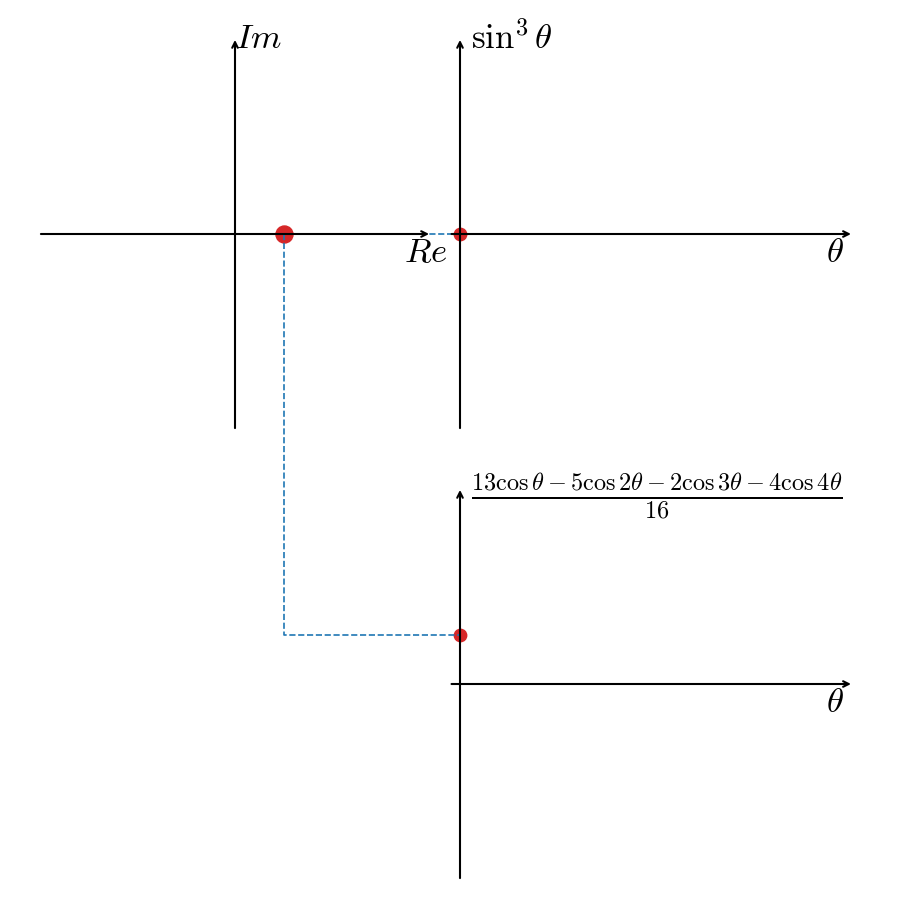

In [21]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

Nf,r,x0,y0 = 600,2.8,[0,4,4],[0,0,-8]
theta = np.linspace(0,np.pi*2,Nf)
f = 1j*np.sin(theta)**3 + 1/16*(13*np.cos(theta)-5*np.cos(2*theta)-2*np.cos(3*theta)-np.cos(4*theta))
clst = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-4,12],ylim=[-12,4])
ax.axis('off')
[ax.annotate('',[(x0[i]+[3.5,7,7][i],y0[i]),(x0[i],y0[i]+3.5)][k],
              [(x0[i]+[-3.5,-.2,-.2][i],y0[i]),(x0[i],y0[i]-3.5)][k],
             arrowprops={'arrowstyle':'->','lw':1.5}) for i in range(3) for k in range(2)]
[ax.text([x0[i]+[3,6.5,6.5][i],x0[i]][k],[y0[i],y0[i]+3.8][k],
         ['$Re$',r'$\theta$',r'$\theta$','$Im$',r' $\sin^3\theta$',r' $\frac{13\cos\theta - 5\cos2\theta-2\cos3\theta-4\cos4\theta}{16}$'][i+k*3],
         size=25,va='top') for i in range(3) for k in range(2)]
sc=[ax.scatter(0,0,marker='o',color='tab:red',s=[150,80,80][k]) for k in range(3)]
lines=[ax.plot([],[],ls=['--','--','-','-'][k],lw=[1.2,1.2,3,3][k], c=clst[0])[0] for k in range(4)]
lines.append(ax.plot([],[],lw=5,c='tab:red')[0])
def animate(k):
  ejnt = r*f[:k+1]
  ejnt1=ejnt[-1]
  [sc[i].set_offsets([x0[i]+[ejnt1.real,theta[k],theta[k]][i],
           y0[i]+[ejnt1.imag,ejnt1.imag,ejnt1.real][i]]) for i in range(3)]
  lines[0].set_data([0,ejnt1.real,theta[k]+x0[1]], [0,ejnt1.imag,ejnt1.imag])
  lines[1].set_data([ejnt1.real,ejnt1.real,theta[k]+x0[2]],[ejnt1.imag,y0[2]+ejnt1.real,y0[2]+ejnt1.real])
  [lines[2+m].set_data(x0[1+m]+theta[:k+1],y0[1+m]+[ejnt.imag,ejnt.real][m]) for m in range(2)]
  lines[4].set_data(ejnt.real,ejnt.imag)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=50)
anim.save("Heart_realImaginary.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)